In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import pylab
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
df_gold = pd.read_csv('stock-data/GOLD.csv')
df_goog = pd.read_csv('stock-data/GOOG.csv')
df_aapl = pd.read_csv('stock-data/AAPL.csv')
df_msft = pd.read_csv('stock-data/MSFT.csv')
df_amzn = pd.read_csv('stock-data/AMZN.csv')

In [3]:
df = df_gold[['Date','Close']]
df.rename(columns={"Close":"GOLD"},inplace=True)
df['GOOG'] = df_goog['Close'].tolist()
df['AAPL'] = df_aapl['Close'].tolist()
df['MSFT'] = df_msft['Close'].tolist()
df['AMZN'] = df_amzn['Close'].tolist()
df.head()

/home/mohsin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/home/mohsin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mohsin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Date,GOLD,GOOG,AAPL,MSFT,AMZN
0,2005-06-20,24.320000,142.814697,5.372857,25.110001,35.689999
1,2005-06-21,24.389999,143.382568,5.408571,25.150000,35.380001
2,2005-06-22,24.480000,144.109848,5.507143,25.070000,35.220001
3,2005-06-23,24.750000,144.314072,5.555714,25.309999,35.430000
4,2005-06-24,24.920000,148.069992,5.394286,25.040001,35.020000


In [4]:
df.tail()

,Date,GOLD,GOOG,AAPL,MSFT,AMZN
3772,2020-06-15,24.740000,1419.849976,342.989990,188.940002,2572.679932
3773,2020-06-16,24.379999,1442.719971,352.079987,193.570007,2615.270020
3774,2020-06-17,24.250000,1451.119995,351.589996,194.240005,2640.979980
3775,2020-06-18,23.940001,1435.959961,351.730011,196.320007,2653.979980
3776,2020-06-19,24.490000,1431.719971,349.720001,195.149994,2675.010010


In [5]:
size = int(len(df)*0.80)
train = df[:size]
test = df[size:]

## White noise

In [6]:
wn = np.random.normal(loc=df.GOOG.mean(),scale=df.GOOG.std(),size=len(df))

In [7]:
df['WN'] = wn

In [8]:
df.mean()

GOLD     26.911991
GOOG    538.666028
AAPL     87.756745
MSFT     50.909391
AMZN    536.369087
WN      531.221211
dtype: float64

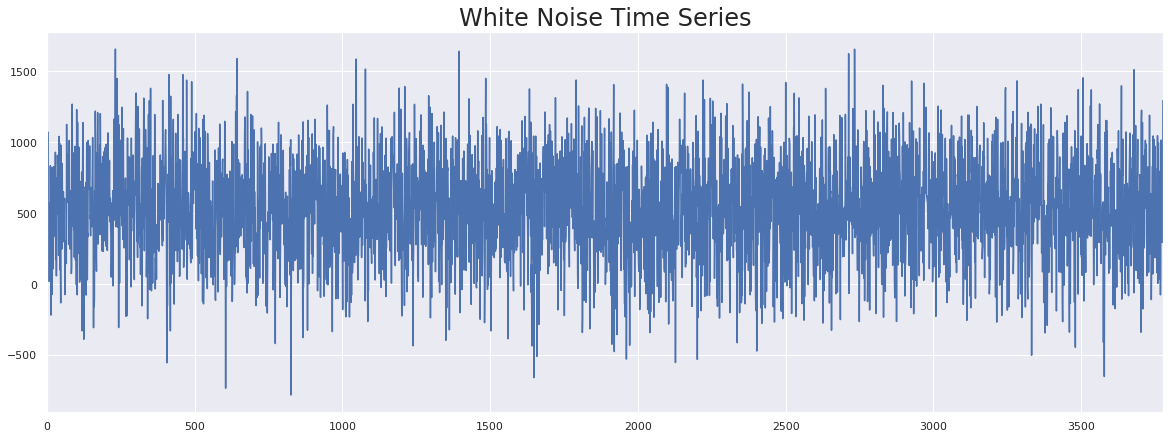

In [9]:
df.WN.plot(figsize=(20,7))
plt.title('White Noise Time Series',size=24)
plt.show()

So there is no pattern in the data.

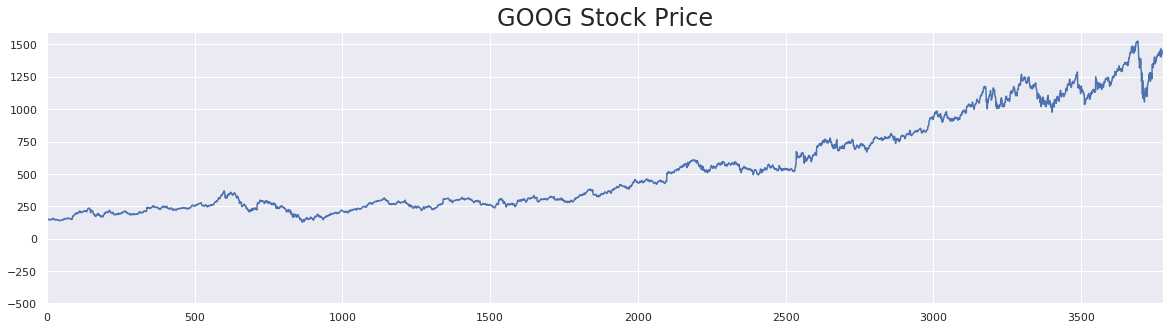

In [10]:
df.GOOG.plot(figsize=(20,5))
plt.title('GOOG Stock Price',size=24)
plt.ylim(-500,1600)
plt.show()

## Random Walk

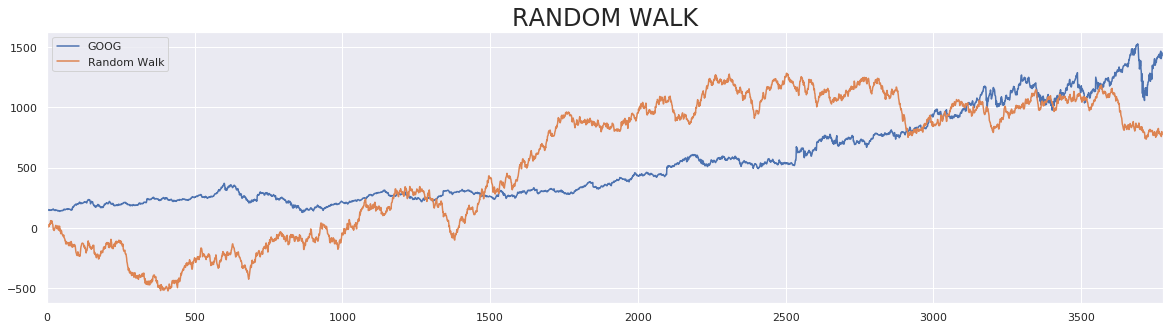

In [15]:
plt.figure(figsize=(20,5))
random_nums =  np.random.randn(len(df)) * 15
random_walk =random_nums.cumsum()
df.GOOG.plot()
plt.plot(random_walk,label="Random Walk")
plt.title("RANDOM WALK",size=24)
plt.legend()
plt.show()

## Stationarity

In [16]:
sts.adfuller(df.GOOG)

(0.6674694186181261,
 0.9891657980289273,
 30,
 3746,
 {'1%': -3.4320968731198844,
  '5%': -2.8623118721638185,
  '10%': -2.5671808782345233},
 28482.92222267491)

Lets examine the output
1. T-Statistics (0.6674694186181261) 
2. P-Value (0.9891657980289273)
    - Probability of not-rejecting the null hypothesis.
3. Number of lags used in regression when determining the t-statistics
4. Number of samples used in the test (3746)
5. Dickey-Fuller table values against 1%, 5% and 10%

In [17]:
sts.adfuller(df.WN)

(-62.338461644467536,
 0.0,
 0,
 3776,
 {'1%': -3.4320829849088885,
  '5%': -2.8623057373147742,
  '10%': -2.567177612264009},
 54747.65639464182)

In [19]:
sts.adfuller(random_walk)

(-1.0694883176295498,
 0.7270850103838353,
 0,
 3776,
 {'1%': -3.4320829849088885,
  '5%': -2.8623057373147742,
  '10%': -2.567177612264009},
 30919.981833301452)

## Seasonality

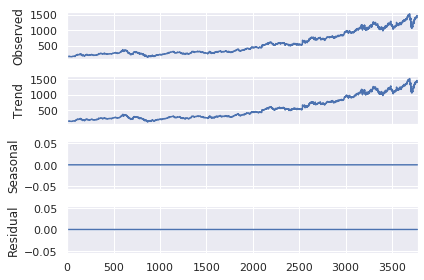

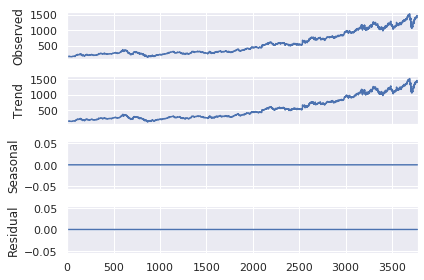

In [26]:
s_dec_additive = seasonal_decompose(df.GOOG,model='additive',freq=1)
s_dec_additive.plot()

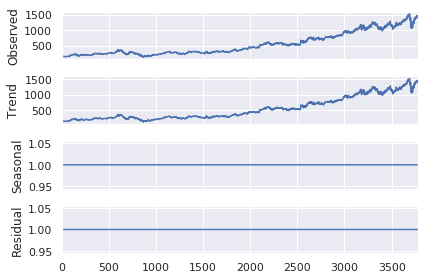

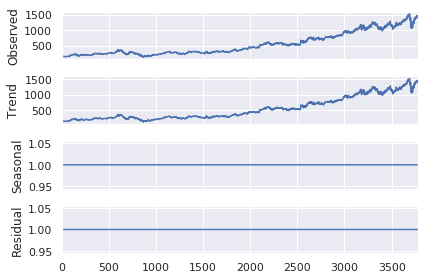

In [27]:
s_dec_multiplicative = seasonal_decompose(df.GOOG,model='multiplicative',freq=1)
s_dec_multiplicative.plot()

## Auto-Correlation

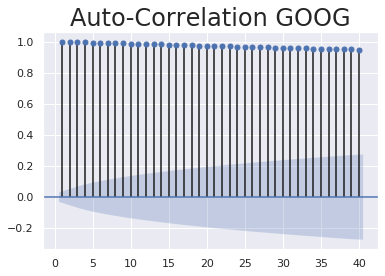

In [37]:
sgt.plot_acf(df.GOOG,lags=40 ,zero=False)
plt.title("Auto-Correlation GOOG",size=24)
plt.show()

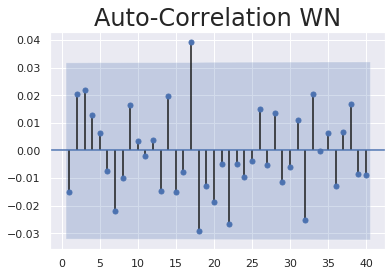

In [38]:
sgt.plot_acf(df.WN,lags=40 ,zero=False)
plt.title("Auto-Correlation WN",size=24)
plt.show()

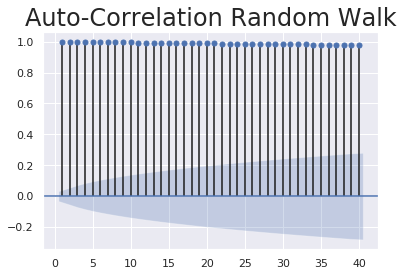

In [39]:
sgt.plot_acf(random_walk,lags=40 ,zero=False)
plt.title("Auto-Correlation Random Walk",size=24)
plt.show()

## Partial Auto-Correlation GOOG

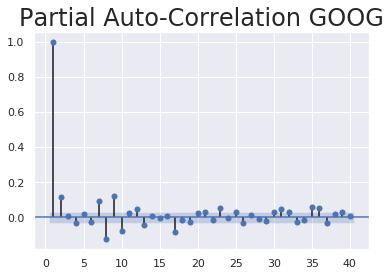

In [40]:
sgt.plot_pacf(df.GOOG,lags=40 ,zero=False,method= ('ols')) # ols = orders of least squared
plt.title("Partial Auto-Correlation GOOG",size=24)
plt.show()

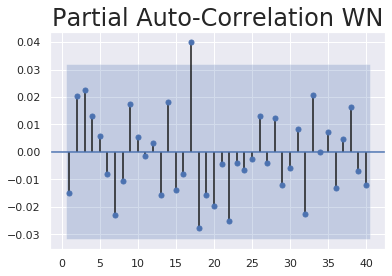

In [41]:
sgt.plot_pacf(df.WN,lags=40 ,zero=False,method= ('ols')) # ols = orders of least squared
plt.title("Partial Auto-Correlation WN",size=24)
plt.show()

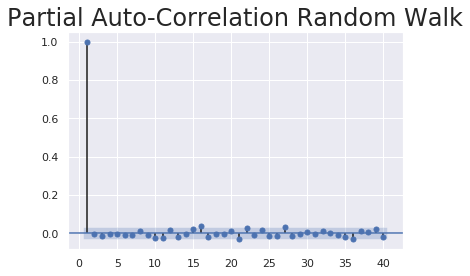

In [42]:
sgt.plot_pacf(random_walk,lags=40 ,zero=False,method= ('ols')) # ols = orders of least squared
plt.title("Partial Auto-Correlation Random Walk",size=24)
plt.show()